In [1]:
"""
Classifiaction problem related to Pima Indians Diabetes Database.

Authors:
-------

Group-123

Snigdha Tarua - 2019ab04171
Sanka Mahesh Sai - 2019ab04135
Aravapalli Chandra Sekhar Gupta - 2019ab04187

"""

In [2]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [3]:
pd.options.display.float_format = "{:.2f}".format

##  <font color="grey"><center>Pima Indians Diabetes Database</center></font>

### Attribute Information:

<pre>
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)
</pre>

### Class Variable interpretation:

* class value 1 is interpreted as "tested positive for diabetes"

### Objective:

* To perform basic analysis on the dataset and to classify based on the provided class label



* Import the data from Indian diabetes dataset (Links to an external site.)  and find dataset description from here (Links to an external site.) (2 points)
* Consider all columns as independent variables and assign to variable X except the last column and consider the last column as the dependent variable and assign to variable y. Remove columns which don’t help the problem statement. (1 point)
* Compute some basic statistical details like percentile, mean, standard deviation of dataset (1 point)
* Do Feature Scaling on Independent variables (2 points)
* Split the data into train and test dataset (1 point)
* Use sklearn library to train on train dataset on logistic regression and predict on test dataset  (3 points)
* Compute the accuracy and confusion matrix. (2 points)

##### <font color="blue">Import the data from Indian diabetes dataset (Links to an external site.) and find dataset description from here (Links to an external site.) (2 points)

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [5]:
# Adding column names to the above dataframe

data.columns = ["num_pregnant", "plasma_conc", "blood_pressure", "skin_thickness", "serum_insulin", \
                "bmi", "diabaties_function", "age", "has_diabetes"]

data.head()

,num_pregnant,plasma_conc,blood_pressure,skin_thickness,serum_insulin,bmi,diabaties_function,age,has_diabetes
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


##### <font color="blue">Compute some basic statistical details like percentile, mean, standard deviation of dataset

In [6]:
# to get a basic descreptive stat summary of the data
data.describe()

,num_pregnant,plasma_conc,blood_pressure,skin_thickness,serum_insulin,bmi,diabaties_function,age,has_diabetes
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [7]:
# checking for null values
data.isnull().sum()

num_pregnant          0
plasma_conc           0
blood_pressure        0
skin_thickness        0
serum_insulin         0
bmi                   0
diabaties_function    0
age                   0
has_diabetes          0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_pregnant        768 non-null    int64  
 1   plasma_conc         768 non-null    int64  
 2   blood_pressure      768 non-null    int64  
 3   skin_thickness      768 non-null    int64  
 4   serum_insulin       768 non-null    int64  
 5   bmi                 768 non-null    float64
 6   diabaties_function  768 non-null    float64
 7   age                 768 non-null    int64  
 8   has_diabetes        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Exploratory data analysis

In [9]:
data['has_diabetes'].value_counts()

0    500
1    268
Name: has_diabetes, dtype: int64

In [10]:
diabetic_count = data['has_diabetes'].value_counts()[0]
non_diabetic_count = data['has_diabetes'].value_counts()[1]

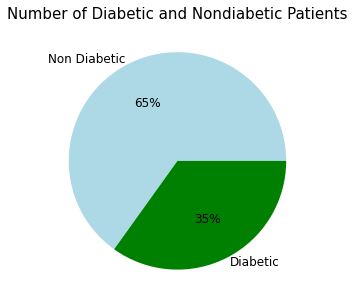

In [11]:
plt.figure(figsize=(5,5))
plt.pie(x=[diabetic_count,non_diabetic_count], labels=[ 'Non Diabetic', 'Diabetic'], autopct='%1.0f%%',pctdistance=0.6,labeldistance=1.05,textprops={'fontsize':12},colors=['lightblue','green'])
plt.title('Number of Diabetic and Nondiabetic Patients',loc='center', fontsize=15)
plt.show()

In [ ]:
sns.pairplot(data,hue='has_diabetes')
plt.show()

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

In [ ]:
data['num_pregnant'].median()

In [ ]:
data['num_pregnant'].mode()[0]

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(4,2,1)
sns.distplot(data['num_pregnant'], color='green')
mean = data['num_pregnant'].mean()
median = data['num_pregnant'].median()
mode = data['num_pregnant'].mode()[0]
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,2)
sns.distplot(data['plasma_conc'], color='blue')
mean = data['plasma_conc'].mean()
median = data['plasma_conc'].median()
mode = data['plasma_conc'].mode()[0]
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,3)
sns.distplot(data['blood_pressure'], color='orange')
mean = data['blood_pressure'].mean()
median = data['blood_pressure'].median()
mode = data['blood_pressure'].mode()[0]
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,4)
sns.distplot(data['skin_thickness'], color='cyan')
mean = data['skin_thickness'].mean()
median = data['skin_thickness'].median()
mode = data['skin_thickness'].mode()[0]
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,5)
sns.distplot(data['serum_insulin'])
mean = data['serum_insulin'].mean()
median = data['serum_insulin'].median()
mode = data['serum_insulin'].mode()[0]
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,6)
sns.distplot(data['bmi'], color='violet')
mean = data['bmi'].mean()
median = data['bmi'].median()
mode = data['bmi'].mode()[0]
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,7)
sns.distplot(data['diabaties_function'], color='forestgreen')
mean = data['diabaties_function'].mean()
median = data['diabaties_function'].median()
mode = data['diabaties_function'].mode()[0]
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,8)
sns.distplot(data['age'], color='royalblue')
mean = data['age'].mean()
median = data['age'].median()
mode = data['age'].mode()[0]
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Correlation Plot

In [ ]:
plt.figure(figsize=(10,10))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

##### <font color="blue">Remove columns which don’t help the problem statement.

On seeing the correlation plot we can observe that **blood_pressure** and **skin_thickness** are least correlated with dependent variable'

Hence, we can remove these 2 columns from the data to have good accuracy

In [ ]:
# dropping blood_pressure and skin_thickness columns

data = data.drop(['blood_pressure','skin_thickness'],axis=1)

## Standaradizing the data

In [ ]:
data.info()

##### <font color="blue">Do Feature Scaling on Independent variables

In [ ]:
ss = StandardScaler()
ss.fit(data.drop(['has_diabetes'], axis=1))
scaled=ss.transform(data.drop(['has_diabetes'], axis=1))
scaled_data=pd.DataFrame(data=scaled, columns=data.columns[:-1])
scaled_data

## Splitting the data

##### <font color="blue">Consider all columns as independent variables and assign to variable X except the last column and consider the last column as the dependent variable and assign to variable y.

In [ ]:
X= scaled_data
y= data['has_diabetes']

##### <font color="blue">Split the data into train and test dataset</font>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Fitting Logistic Regression

##### <font color="blue">Use sklearn library to train on train dataset on logistic regression and predict on test dataset.</font>

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)

In [ ]:
clf.score(X_train, y_train)

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred_prob = clf.predict_proba(X_test)
y_pred_prob = list(pd.DataFrame(y_pred_prob)[1])

## Calculating elbow plot

In [ ]:
error_rate=[]
thresh_values = [0.3,0.4,0.5,0.6,0.7]
for threshold in thresh_values:
    y_pred = [1 if x > threshold else 0 for x in y_pred_prob]
    error_rate.append(np.mean(y_pred!=y_test))
print(error_rate)
plt.figure(figsize=(9,6))
plt.plot(thresh_values, error_rate,color='royalblue', marker='o', linewidth=2, markersize=12, markerfacecolor='deeppink', markeredgecolor='deeppink' )
plt.xlabel('Probability Threshold', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.title('Error Rate Versus Probability Threshold', fontsize=15)
plt.show()

**Optimal Thresold is 0.55 from above graph so considering that to evaluate our model.**

In [ ]:
y_pred = [1 if x > 0.55 else 0 for x in y_pred_prob]

##### <font color="blue">Compute the accuracy and confusion matrix.

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))

<pre>
True Negatives : 144
False Negatives : 38
False Positives : 13
True Positives : 36
</pre>

In [ ]:
confusion_matrix_data = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2), range(2))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(confusion_matrix_data, annot=True, annot_kws={"size": 16}) # font size

plt.show()

We have tried to answer all the asked questions and highlighted them in blue where we have answered.